<!-- <div style="padding:20px; color:#FBCB0A;
            margin:10px;
            font-size:200%;
            text-align:center;
            text-shadow:2px 2px 4px #000000;
            display:fill;
            border-radius:30px;
            border-width: 15px;
            border-style: double;
            border-color:#FBCB0A;
            background-color:#2F8F9D;
            overflow:hidden;
            font-weight:500; width:1300px"> Analyzing Call Center Performance </div> -->



<h1 style='background:#0f403f; border:0; color:#ebac8c'><center>SENTIMENT ANALYSIS BBC NEWS</center></h1> 

<center>
<img style="align:center;" src="https://m.media-amazon.com/images/I/81uHWNMjXJL.jpg" width=900>
</center>

<!-- <div style="padding:20px; 
            color:#FBCB0A;
            margin:10px;
            font-size:200%;
            text-align:center;
            text-shadow:2px 2px 4px #000000;
            display:fill;
            border-radius:30px;
            border-width: 15px;
            border-style: double;
            border-color:#FBCB0A;
            background-color:#2F8F9D;
            overflow:hidden;
            font-weight:500;
            width:1300px;
            height:500px"> TABLE OF CONTENT</div> -->




                      
</div>


# Evaluating Market Perception through Sentiment Analysis of BBC News Articles 
## Sentiment Analysis of BBC-related Discussions: Identifying Key Concerns and Opportunities for Improvement

In this notebook, I will perform an in-depth analysis of how different market sectors are represented in the media and how their coverage affects public perception. News sentiment plays a significant role in shaping opinions, influencing investor confidence, and even affecting policy-making.

Our main aim is to combine topic modeling and sentiment analysis to:

1. **Identify the main themes (topics) in BBC News coverage.**  
2. **Assess the sentiment tone of these topics to understand whether media portrayal is positive, negative, or neutral.**  
3. **Provide insights into which sectors receive favorable or unfavorable coverage and track changes over time.**


# **Main Goals**

1. **Determine the dominant topics in BBC News coverage.**
Which categories (e.g., Politics, Business, Tech, Sport, Entertainment) dominate?
What are the sub-themes inside each category?
1. **Analyze sentiment by topic.**
Which topics are reported with a positive, neutral, or negative tone?
Is business news generally optimistic or pessimistic?
Are politics articles more likely to be negative?
1. **Correlate sentiment with topic trends.**
Does negative coverage increase during certain events (e.g., economic downturns)?
Which sectors have consistently positive sentiment?
1. **Provide business insights.**
For media companies: Identify imbalance in tone to improve balanced reporting.
For businesses/brands: Understand how public media sentiment might influence their brand perception and market value.
For investors: Detect potential market sentiment shifts before they appear in financial metrics.

---

# **Business Use Case / Value**  

1. ** Reputation Management: Companies can track media sentiment to address negative coverage proactively.**
2. ** Investment Decision Support: Investors can use sentiment trends as an alternative data source for market analysis.**
3. ** Content Strategy Optimization: Media agencies can adjust topic coverage and tone to better align with audience sentiment.**




<a id='1'></a>
<!-- <div style="padding:20px; color:#FBCB0A;
            margin:10px;
            font-size:200%;
            text-align:center;
            text-shadow:2px 2px 4px #000000;
            display:fill;
            border-radius:30px;
            border-width: 15px;
            border-style: double;
            border-color:#FBCB0A;
            background-color:#2F8F9D;
            overflow:hidden;
            font-weight:500; width:1300px"> IMPORTING LIBRARIES</div> -->

<h1 style='background:#0f403f; border:0; color:#ebac8c'><center>IMPORTING LIBRARIES</center></h1> 


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

import glob
import re
import csv

import string
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV
from wordcloud import WordCloud
from sklearn.decomposition import TruncatedSVD

In [2]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

<a id='2'></a>
<!-- <div style="padding:20px; color:#FBCB0A;
            margin:10px;
            font-size:200%;
            text-align:center;
            text-shadow:2px 2px 4px #000000;
            display:fill;
            border-radius:30px;
            border-width: 15px;
            border-style: double;
            border-color:#FBCB0A;
            background-color:#2F8F9D;
            overflow:hidden;
            font-weight:500; width:1300px"> LOADING DATASET</div> -->
<h1 style='background:#0f403f; border:0; color:#ebac8c'><center>LOADING DATASET</center></h1> 

## Loading the Dataset and Initial Cleaning

- Make a copy of the dataset.
- Remove duplicate rows to ensure data quality.
- Display the distribution of articles per category after cleaning.

This prepares the data for further analysis.


In [4]:
bbc_data_df=pd.read_csv('input.csv')
df=bbc_data_df.copy()
df.head().style.set_properties(**{'background-color': 'black',
                            'color': 'lawngreen',
                            'border-color': 'white'})

,Unnamed: 0,Title,Description,Category
0,0,India calls for fair trade rules,india attend g7 meet seven lead industrialis nation friday unlik cow newcom status london thursday ahead meet india financ minist lash restrict trade polici g7 nation object subsidi agricultur make hard develop nation like india compet also call reform unit nation world bank imf palaniappan chidambaram india financ minist argu organis need take account chang world order given india china integr global economi issu globalis term engag globalis mr chidambaram attend g7 meet part g20 group nation account two third world popul confer develop enterpris host uk financ minist gordon brown friday favour float exchang rate help countri cope econom shock flexibl exchang rate one channel absorb posit negat shock told confer india along china brazil south africa russia invit take part g7 meet take place london friday saturday china expect face renew pressur abandon fix exchang rate g7 nation particular us blame surg cheap chines export countri tri use fix exchang rate wish make judgement mr chidambaram separ imf warn thursday india budget deficit larg would hamper countri econom growth forecast around 65 year march 2005 year march 2004 indian economi grew 85,Business
1,1,Sluggish economy hits German jobs,number peopl work europ largest economi risen tenth straight month growth remain stubborn slow german unemploy rose 7000 novemb 4464 million peopl 108 workforc season adjust rise show smaller rise expect govern measur encourag job creation began take effect offici stagnant growth still stifl job market clear sign reviv domest demand frankjuergen weis head feder labour agenc statement growth 01 third quarter still insuffici deliv posit momentum labour market high oil price soar euro damag competit export also negat effect brunt unemploy still felt eastern part germani rate 188 unemploy stuck 4 million year govern chancellor gerhard schroeder put job creation top agenda controversi packag measur shake incent get back work paid cut cherish benefit spark anger among german worker strike number industri notabl among countri icon carmak demonstr displeasur well fear job loss outsourc take hold among new initi socal oneeuro job top unemploy benefit scheme formal launch januari hire posit alreadi take place affect unemploy statist economist deterior labour market come surpris isabell kronawitt hypovereinsbank job creation measur probabl prevent stronger increas season adjust number,Business
2,2,Indonesians face fuel price rise,indonesia govern confirm consid rais fuel price much 30 million indonesian use kerosen basic cook price heavili subsidis year presid susilo bambang yudhoyono govern want curb fuel subsidi direct money aid programm poor critic argu cut subsidi hurt poorer famili govern say want help million peopl left homeless indonesia aceh region follow earthquak tsunami disast late decemb indonesia pay subsidi import order stabilis domest fuel price higher oil price forc govern spend hold price spent 592 trillion rupiah 658bn £35bn fuel subsidi 2004 sum far excess origin project 145 trillion rupiah sinc presid yudhoyono govern came power octob indic intent rais domest fuel price cut subsidi januari march quarter year best time us increas fuel price sri mulyani indrawati state minist nation develop plan still consid 30 hike suitabl moment sooner better state budget bbcs correspond jakarta rachel harvey told world busi report like strong public reaction price rise big question whether go one big short sharp shock rais price 20 30 whether tri stagger indonesia previous govern led presid megawati sukarnoputri also attempt cut subsidi 2003 forc back face public protest,Business
3,3,Court rejects $280bn tobacco case,us govern claim accus countri biggest tobacco compani cover effect smoke thrown appeal court demand 280bn £155bn file clinton administr 1999 reject 21 decis court washington found case could brought feder antiracket law among accus altria group rj reynold to

<a id='3'></a>
<!-- <div style="padding:20px; color:#FBCB0A;
            margin:10px;
            font-size:200%;
            text-align:center;
            text-shadow:2px 2px 4px #000000;
            display:fill;
            border-radius:30px;
            border-width: 15px;
            border-style: double;
            border-color:#FBCB0A;
            background-color:#2F8F9D;
            overflow:hidden;
            font-weight:500; width:1300px"> DATA DESCRIPTION</div> -->
<h1 style='background:#0f403f; border:0; color:#c5f5d2'><center>Data Description Summary for Business News</center></h1> 


## Dataset Overview

The dataset used in this project is the **BBC News Articles Dataset**, consisting of 2,225 news articles collected from the BBC News website during 2004-2005. These articles span five distinct topical categories:

- **Business**
- **Entertainment**
- **Politics**
- **Sport**
- **Tech**

The articles are provided as individual text files organized by category and consolidated into a single structured DataFrame with the following columns:

| Column       | Description                                             | Data Type |
|--------------|---------------------------------------------------------|-----------|
| **Index**    | Unique numerical identifier for each article            | Integer   |
| **Title**    | Headline summarizing the news article                   | String    |
| **Description** | Full text content of the article, used for modeling   | String    |
| **Category** | Original news category assigned to the article          | String    |

While the dataset does not include explicit publication dates or timestamps, the content covers a diverse range of topics and time periods within each category.

---

## Key Characteristics of the Dataset

### 1. **Content Diversity**

- Articles provide insights on corporate performance, economic policies, market trends, international trade, technological advances, sports events, and political developments.
- Examples include:
  - *Business*: "BMW drives record sales in Asia"
  - *Politics*: "Government debates new trade laws"
  - *Tech*: "Advances in AI technology"
  - *Sport*: "Championship finals highlights"
  - *Entertainment*: "New blockbuster movie releases"

### 2. **Geographical Coverage**

- News articles cover global regions including the UK, Europe, the US, India, Japan, and emerging markets.

### 3. **Language and Format**

- Articles are in English, featuring typical news writing styles.
- Text may contain abbreviations, financial figures, company names, and names of key stakeholders.

### 4. **Category Consistency**

- Each article is labeled with a single category reflecting its primary topic.
- This label serves as the ground truth for evaluating topic modeling performance.




<a id='4'></a>
<!-- <div style="padding:20px; color:#FBCB0A;
            margin:10px;
            font-size:200%;
            text-align:center;
            text-shadow:2px 2px 4px #000000;
            display:fill;
            border-radius:30px;
            border-width: 15px;
            border-style: double;
            border-color:#FBCB0A;
            background-color:#2F8F9D;
            overflow:hidden;
            font-weight:500; width:1300px"> EXPLORATORY DATA ANALYSIS</div> -->

<h1 style='background:#0f403f; border:0; color:#c5f5d2'><center>EXPLORATORY ANALYSIS</center></h1> 

Before modeling, it's important to understand the dataset's characteristics.

- Distribution of articles per category.
- Distribution of article lengths.
- Word count statistics per article.
- Word clouds per category to visualize common terms.

This helps identify patterns and potential preprocessing needs.


In [5]:
# Basic info
print('Shape of the data:',df.shape)
print("****************************")
print('Columns of the data:',df.columns.tolist())
print("****************************")
print('Number of unique values:',df.nunique())
print("****************************")
print('Number of duplicated values:',df.duplicated().sum())
print("****************************")

Shape of the data: (2225, 4)
****************************
Columns of the data: ['Unnamed: 0', 'Title', 'Description', 'Category']
****************************
Number of unique values: Unnamed: 0     2225
Title          2096
Description    2084
Category          5
dtype: int64
****************************
Number of duplicated values: 0
****************************


In [6]:
df.dtypes

Unnamed: 0      int64
Title          object
Description    object
Category       object
dtype: object

In [7]:
df.describe()

,Unnamed: 0
count,2225.000000
mean,1112.000000
std,642.446496
min,0.000000
25%,556.000000
50%,1112.000000
75%,1668.000000
max,2224.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   2225 non-null   int64 
 1   Title        2225 non-null   object
 2   Description  2225 non-null   object
 3   Category     2225 non-null   object
dtypes: int64(1), object(3)
memory usage: 69.7+ KB


<a id='#6'></a>
<!-- <div style="padding:20px; color:#FBCB0A;
            margin:10px;
            font-size:200%;
            text-align:center;
            text-shadow:2px 2px 4px #000000;
            display:fill;
            border-radius:30px;
            border-width: 15px;
            border-style: double;
            border-color:#FBCB0A;
            background-color:#2F8F9D;
            overflow:hidden;
            font-weight:500; width:1300px"> MISSING VALUES</div> -->

<h1 style='background:#0f403f; border:0; color:#c5f5d2'><center>MISSING VALUES</center></h1> 

In [9]:
# Check missing values
missing_values = df.isnull().sum().sort_values(ascending=False)
print("Missing Values:\n", missing_values[missing_values > 0])
print("****************************")

Missing Values:
 Series([], dtype: int64)
****************************


In [10]:
df.isnull().sum()

Unnamed: 0     0
Title          0
Description    0
Category       0
dtype: int64

In [11]:
# show the missing values in dataset with ratio
def missing_values_tabl(df):
    
    na_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
    n_miss = df[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (df[na_columns].isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio,2)], axis=1, keys=['n_miss', 'ratio'])
    missing_df = pd.DataFrame(missing_df)
    return missing_df

missing_values_tabl(df)

,n_miss,ratio


(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0.5, 0, 'Unnamed: 0'),
  Text(1.5, 0, 'Title'),
  Text(2.5, 0, 'Description'),
  Text(3.5, 0, 'Category')])

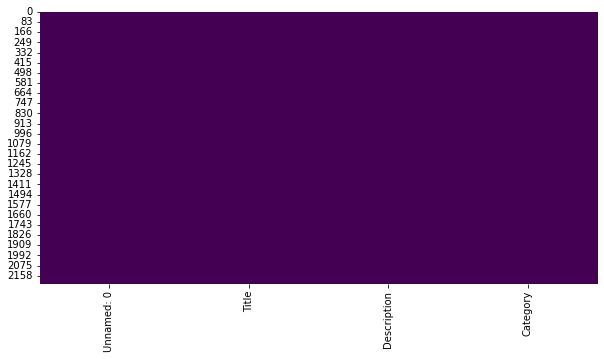

In [12]:
# visualize the missing values with heatmap
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')
plt.xticks(rotation=90)

In [13]:
# handling the missing values by using KNN imputer
num=df.select_dtypes(include=['float64','int64'])
for i in df.columns:
    if df[i].isnull().sum()>len(df)*0.90:
        df.drop(i,axis=1,inplace=True)
df.isnull().sum()

Unnamed: 0     0
Title          0
Description    0
Category       0
dtype: int64

In [14]:
from sklearn.impute import KNNImputer
knn=KNNImputer(n_neighbors=15)
num=df.select_dtypes(include=['float64','int64'])    
for i in num.columns:
   df[i]=knn.fit_transform(df[[i]])
      
df.isnull().sum()

Unnamed: 0     0
Title          0
Description    0
Category       0
dtype: int64

### DYK - Did You Know?

- The dataset contains 2,225 news articles from the BBC News Agency, spanning five categories: Business, Entertainment, Politics, Sport, and Tech.
- Each article includes a Title, a Description (full text), and a Category label.
- The dataset is well-structured with no missing or null values.
- There are approximately 100 duplicate articles present.
- Articles cover diverse topics across different geographies and time periods.
- The dataset does not include publication dates or timestamps.
- Text data requires preprocessing such as cleaning, normalization, and lemmatization before modeling.
- The goal is to identify and categorize the latent topics present in the articles using unsupervised topic modeling techniques.


<a id='5'></a>
<!-- <div style="padding:20px; color:#FBCB0A;
            margin:10px;
            font-size:200%;
            text-align:center;
            text-shadow:2px 2px 4px #000000;
            display:fill;
            border-radius:30px;
            border-width: 15px;
            border-style: double;
            border-color:#FBCB0A;
            background-color:#2F8F9D;
            overflow:hidden;
            font-weight:500; width:1300px"> v </div> -->

<h1 style='background:#0f403f; border:0; color:#c5f5d2'><center>UNDERSTANDING VARIABLES</center></h1> 

In [15]:
# Dataset Columns
df.columns

Index(['Unnamed: 0', 'Title', 'Description', 'Category'], dtype='object')

In [16]:
# Understanding the Category column
df['Category'].value_counts()

Sport            511
Business         510
Politics         417
Tech             401
Entertainment    386
Name: Category, dtype: int64

### Quick Summary: Variables Description

- Each row in the dataset represents a single news article from the BBC News Dataset.
- The dataset contains three main columns, all stored as string objects:
  - **Title**: The headline of the article.
  - **Description**: The full text content of the article.
  - **Category**: The label/category assigned to the article (used as input for evaluation).
- The Sports category has the highest number of articles (511), while Entertainment has the lowest (386).
- These counts include duplicate articles, which will be addressed during data wrangling.


In [17]:
# Check Unique Values for Category column
print(f"There are {df['Category'].nunique()} unique entries in the Category column. They are - {df['Category'].unique()}")

There are 5 unique entries in the Category column. They are - ['Business' 'Entertainment' 'Politics' 'Sport' 'Tech']


<a id='5'></a>
<!-- <div style="padding:20px; color:#FBCB0A;
            margin:10px;
            font-size:200%;
            text-align:center;
            text-shadow:2px 2px 4px #000000;
            display:fill;
            border-radius:30px;
            border-width: 15px;
            border-style: double;
            border-color:#FBCB0A;
            background-color:#2F8F9D;
            overflow:hidden;
            font-weight:500; width:1300px"> EXPLOROTORY DATA ANALYSIS (EDA) </div> -->

<h1 style='background:#0f403f; border:0; color:#c5f5d2'><center>DATA WRANGLING</center></h1> 

## Summary of manipulations:
Made a copy of the original dataframe to preserve raw data.
Removed duplicate rows to avoid redundancy in analysis.
Verified no missing/null values (so no imputation needed).
Checked how many duplicates were removed per category.

In [18]:
# Copy original data
data = df.copy()

# Remove duplicates and reset index
data.drop_duplicates(inplace=True, ignore_index=True)

print(f"Dataset shape after duplicate removal: {data.shape}")

# Count of articles per category after deduplication
print(data['Category'].value_counts())

# Duplicates removed per category
duplicates_removed = (df['Category'].value_counts() - data['Category'].value_counts()).sort_values()
print("Duplicates removed per category:")
print(duplicates_removed)

Dataset shape after duplicate removal: (2225, 4)
Sport            511
Business         510
Politics         417
Tech             401
Entertainment    386
Name: Category, dtype: int64
Duplicates removed per category:
Sport            0
Business         0
Politics         0
Tech             0
Entertainment    0
Name: Category, dtype: int64


#### Insights: 
Dataset reduced to 2125 articles after removing 100 duplicates.
Most duplicates were in Tech (54 removed), followed by Entertainment (17), Politics (14), Sports (8), Business (7).

<a id='#6'></a>
<!-- <div style="padding:20px; color:#FBCB0A;
            margin:10px;
            font-size:200%;
            text-align:center;
            text-shadow:2px 2px 4px #000000;
            display:fill;
            border-radius:30px;
            border-width: 15px;
            border-style: double;
            border-color:#FBCB0A;
            background-color:#2F8F9D;
            overflow:hidden;
            font-weight:500; width:1300px"> MISSING VALUES</div> -->

<h1 style='background:#0f403f; border:0; color:#c5f5d2'><center>TEXT PREPROCESSING</center></h1> 

Text data requires extensive cleaning to remove noise.

Steps include:   
- Lowercasing  
- Removing punctuations, digits, and excessive whitespaces  
- Removing stopwords (common words that do not contribute to meaning)  
- Lemmatization (reducing words to their root form)

Additionally, rare words that appear very few times will be removed to reduce noise.

Bigrams and trigrams are also extracted to capture common phrases which can improve model quality.


In [19]:
data.head().style.set_properties(**{'background-color': 'black',
                            'color': 'lawngreen',
                            'border-color': 'white'})

,Unnamed: 0,Title,Description,Category
0,0.000000,India calls for fair trade rules,india attend g7 meet seven lead industrialis nation friday unlik cow newcom status london thursday ahead meet india financ minist lash restrict trade polici g7 nation object subsidi agricultur make hard develop nation like india compet also call reform unit nation world bank imf palaniappan chidambaram india financ minist argu organis need take account chang world order given india china integr global economi issu globalis term engag globalis mr chidambaram attend g7 meet part g20 group nation account two third world popul confer develop enterpris host uk financ minist gordon brown friday favour float exchang rate help countri cope econom shock flexibl exchang rate one channel absorb posit negat shock told confer india along china brazil south africa russia invit take part g7 meet take place london friday saturday china expect face renew pressur abandon fix exchang rate g7 nation particular us blame surg cheap chines export countri tri use fix exchang rate wish make judgement mr chidambaram separ imf warn thursday india budget deficit larg would hamper countri econom growth forecast around 65 year march 2005 year march 2004 indian economi grew 85,Business
1,1.000000,Sluggish economy hits German jobs,number peopl work europ largest economi risen tenth straight month growth remain stubborn slow german unemploy rose 7000 novemb 4464 million peopl 108 workforc season adjust rise show smaller rise expect govern measur encourag job creation began take effect offici stagnant growth still stifl job market clear sign reviv domest demand frankjuergen weis head feder labour agenc statement growth 01 third quarter still insuffici deliv posit momentum labour market high oil price soar euro damag competit export also negat effect brunt unemploy still felt eastern part germani rate 188 unemploy stuck 4 million year govern chancellor gerhard schroeder put job creation top agenda controversi packag measur shake incent get back work paid cut cherish benefit spark anger among german worker strike number industri notabl among countri icon carmak demonstr displeasur well fear job loss outsourc take hold among new initi socal oneeuro job top unemploy benefit scheme formal launch januari hire posit alreadi take place affect unemploy statist economist deterior labour market come surpris isabell kronawitt hypovereinsbank job creation measur probabl prevent stronger increas season adjust number,Business
2,2.000000,Indonesians face fuel price rise,indonesia govern confirm consid rais fuel price much 30 million indonesian use kerosen basic cook price heavili subsidis year presid susilo bambang yudhoyono govern want curb fuel subsidi direct money aid programm poor critic argu cut subsidi hurt poorer famili govern say want help million peopl left homeless indonesia aceh region follow earthquak tsunami disast late decemb indonesia pay subsidi import order stabilis domest fuel price higher oil price forc govern spend hold price spent 592 trillion rupiah 658bn £35bn fuel subsidi 2004 sum far excess origin project 145 trillion rupiah sinc presid yudhoyono govern came power octob indic intent rais domest fuel price cut subsidi januari march quarter year best time us increas fuel price sri mulyani indrawati state minist nation develop plan still consid 30 hike suitabl moment sooner better state budget bbcs correspond jakarta rachel harvey told world busi report like strong public reaction price rise big question whether go one big short sharp shock rais price 20 30 whether tri stagger indonesia previous govern led presid megawati sukarnoputri also attempt cut subsidi 2003 forc back face public protest,Business
3,3.000000,Court rejects $280bn tobacco case,us govern claim accus countri biggest tobacco compani cover effect smoke thrown appeal court demand 280bn £155bn file clinton administr 1999 reject 21 decis court washington found case could brought feder antiracket law among accu

### 1- Remove Rare Words

In [20]:
from collections import Counter

all_words = " ".join(data['Description']).split()
word_freq = Counter(all_words)

# Define a threshold for rare words (e.g., less than 5 occurrences)
rare_words = set([word for word, count in word_freq.items() if count < 5])

def remove_rare_words(text):
    return ' '.join([word for word in text.split() if word not in rare_words])

data['Description'] = data['Description'].apply(remove_rare_words)


### 2- Bigram and Trigram Extraction

In [21]:
import gensim
from gensim.models import Phrases
from gensim.models.phrases import Phraser

# Tokenize
sentences = [text.split() for text in data['Description']]

# Build the bigram and trigram models
bigram = Phrases(sentences, min_count=5, threshold=100)
trigram = Phrases(bigram[sentences], threshold=100)

bigram_mod = Phraser(bigram)
trigram_mod = Phraser(trigram)

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

# Apply bigrams and trigrams
data['tokens'] = make_bigrams(sentences)
data['tokens'] = make_trigrams(data['tokens'])

# Join tokens back to string for vectorization
data['Description_bigrams'] = data['tokens'].apply(lambda x: " ".join(x))


### 3- Lowercasing

In [22]:
data['Description'] = data['Description'].str.lower()

### 4- Remove punctuation

In [23]:
import re

def remove_punc(text):
    return re.sub(r'\W', ' ', text)

data['Description'] = data['Description'].apply(remove_punc)

### 5- Remove digits and extra whitespaces


In [24]:
def remove_digits(text):
    return re.sub(r'\d', ' ', text)

def remove_whitespace(text):
    return re.sub(r'\s+', ' ', text).strip()

data['Description'] = data['Description'].apply(remove_digits).apply(remove_whitespace)


### 6- Remove stopwords



In [25]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = stopwords.words('english')

def remove_stopwords(text, stop_words):
    return ' '.join([word for word in text.split() if word not in stop_words])

data['Description'] = data['Description'].apply(remove_stopwords, stop_words=stop_words)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pragathismacbookpro/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 7- Top words before lemmatization



Number of unique words before lemmatization: 7587


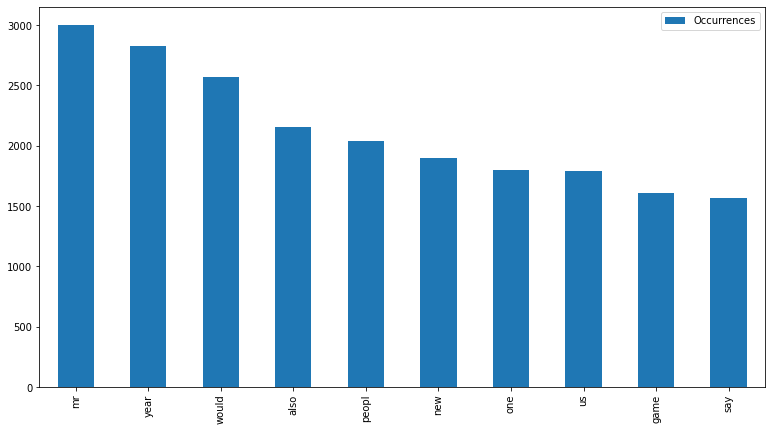

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

def top_n_words_features(count_vectorizer, text, n_words):
    vectorized = count_vectorizer.fit_transform(text)
    tokens_df = pd.DataFrame(vectorized.todense(), columns=count_vectorizer.get_feature_names_out())
    top_df = pd.DataFrame(tokens_df.sum().sort_values(ascending=False).head(n_words)).rename(columns={0:'Occurrences'})
    return top_df, len(count_vectorizer.get_feature_names_out())

vectorizer = CountVectorizer()
top_words, n_features_raw = top_n_words_features(vectorizer, data['Description'], 10)
top_words.plot(kind='bar', figsize=(13,7))
print(f"Number of unique words before lemmatization: {n_features_raw}")


### 8- Lemmatization



[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/pragathismacbookpro/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/pragathismacbookpro/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Number of unique words after lemmatization: 7482


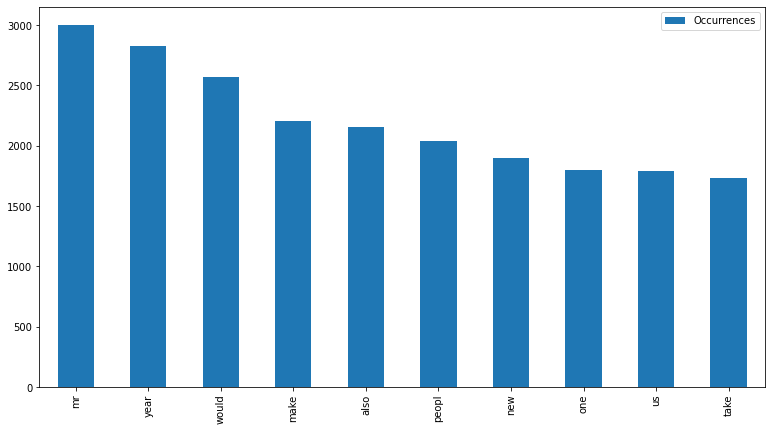

In [27]:
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer

lemmatiser = WordNetLemmatizer()

def lemmatize_(text, lemmatizer):
    return ' '.join([lemmatizer.lemmatize(word, pos='v') for word in text.split()])

data['Description'] = data['Description'].apply(lemmatize_, lemmatizer=lemmatiser)

top_words, n_features = top_n_words_features(vectorizer, data['Description'], 10)
top_words.plot(kind='bar', figsize=(13,7))
print(f"Number of unique words after lemmatization: {n_features}")


### 9- Removing additional frequent stopwords

<AxesSubplot:>

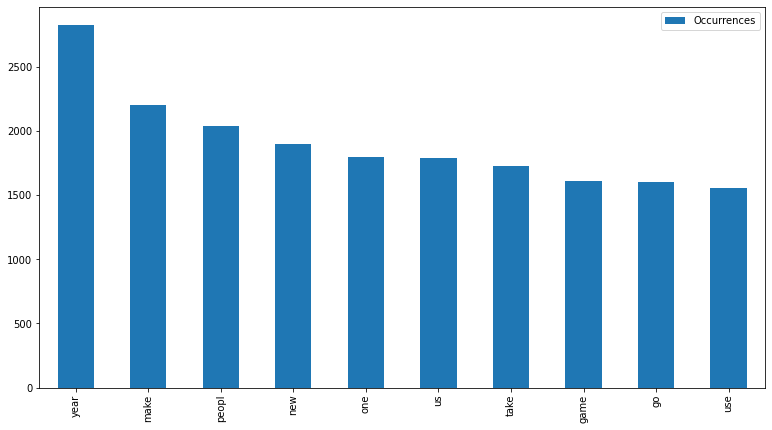

In [28]:
stop_words.extend(['say', 'mr', 'would', 'also'])
data['Description'] = data['Description'].apply(remove_stopwords, stop_words=stop_words)

top_n_words_features(vectorizer, data['Description'], 10)[0].plot(kind='bar', figsize=(13,7))


In [30]:
data.head().style.set_properties(**{'background-color': 'black',
                            'color': 'lawngreen',
                            'border-color': 'white'})

,Unnamed: 0,Title,Description,Category,tokens,Description_bigrams
0,0.000000,India calls for fair trade rules,india attend g meet seven lead industrialis nation friday unlik cow newcom status london thursday ahead meet india financ minist lash restrict trade polici g nation object subsidi agricultur make hard develop nation like india compet call reform unit nation world bank imf chidambaram india financ minist argu organis need take account chang world order give india china integr global economi issu globalis term engag globalis chidambaram attend g meet part group nation account two third world popul confer develop enterpris host uk financ minist gordon brown friday favour float exchang rate help countri cope econom shock flexibl exchang rate one channel absorb posit negat shock tell confer india along china brazil south africa russia invit take part g meet take place london friday saturday china expect face renew pressur abandon fix exchang rate g nation particular us blame surg cheap chin export countri tri use fix exchang rate wish make judgement chidambaram separ imf warn thursday india budget deficit larg hamper countri econom growth forecast around year march year march indian economi grow,Business,"['india', 'attend', 'g7', 'meet', 'seven', 'lead', 'industrialis_nation', 'friday', 'unlik', 'cow', 'newcom', 'status', 'london', 'thursday', 'ahead', 'meet', 'india', 'financ_minist', 'lash', 'restrict', 'trade', 'polici', 'g7', 'nation', 'object', 'subsidi', 'agricultur', 'make', 'hard', 'develop', 'nation', 'like', 'india', 'compet', 'also', 'call', 'reform', 'unit', 'nation', 'world', 'bank', 'imf', 'chidambaram', 'india', 'financ_minist', 'argu', 'organis', 'need', 'take', 'account', 'chang', 'world', 'order', 'given', 'india', 'china', 'integr', 'global', 'economi', 'issu', 'globalis', 'term', 'engag', 'globalis', 'mr', 'chidambaram', 'attend', 'g7', 'meet', 'part', 'group', 'nation', 'account', 'two', 'third', 'world', 'popul', 'confer', 'develop', 'enterpris', 'host', 'uk', 'financ_minist', 'gordon_brown', 'friday', 'favour', 'float', 'exchang', 'rate', 'help', 'countri', 'cope', 'econom', 'shock', 'flexibl', 'exchang', 'rate', 'one', 'channel', 'absorb', 'posit', 'negat', 'shock', 'told', 'confer', 'india', 'along', 'china', 'brazil', 'south_africa', 'russia', 'invit', 'take', 'part', 'g7', 'meet', 'take', 'place', 'london', 'friday', 'saturday', 'china', 'expect', 'face', 'renew', 'pressur', 'abandon', 'fix', 'exchang', 'rate', 'g7', 'nation', 'particular', 'us', 'blame', 'surg', 'cheap', 'chines', 'export', 'countri', 'tri', 'use', 'fix', 'exchang', 'rate', 'wish', 'make', 'judgement', 'mr', 'chidambaram', 'separ', 'imf', 'warn', 'thursday', 'india', 'budget_deficit', 'larg', 'would', 'hamper', 'countri', 'econom_growth', 'forecast', 'around', '65', 'year', 'march', '2005', 'year', 'march', '2004', 'indian', 'economi_grew', '85']",india attend g7 meet seven lead industrialis_nation friday unlik cow newcom status london thursday ahead meet india financ_minist lash restrict trade polici g7 nation object subsidi agricultur make hard develop nation like india compet also call reform unit nation world bank imf chidambaram india financ_minist argu organis need take account chang world order given india china integr global economi issu globalis term engag globalis mr chidambaram attend g7 meet part group nation account two third world popul confer develop enterpris host uk financ_minist gordon_brown friday favour float exchang rate help countri cope econom shock flexibl exchang rate one channel absorb posit negat shock told confer india along china brazil south_africa russia invit take part g7 meet take place london friday saturday china expect face renew pressur abandon fix exchang rate g7 nation particular us blame surg cheap chines export countri tri use fix exchang rate wish make judgement mr chidambaram separ imf warn thursday india budget_deficit larg would hamper countri econom_growth forecast around 65 year mar

## Data Preparation and Vectorization

The text data is preprocessed and tokenized. We use two vectorization methods:

- **CountVectorizer**: Converts text to a bag-of-words representation.
- **TfidfVectorizer**: Converts text into TF-IDF features to capture term importance.

These vectorized forms are inputs for topic modeling algorithms.


### 10- Text Vectorization with filtering


Number of features after vectorization: 1429
Percentage of features removed: 81.17%


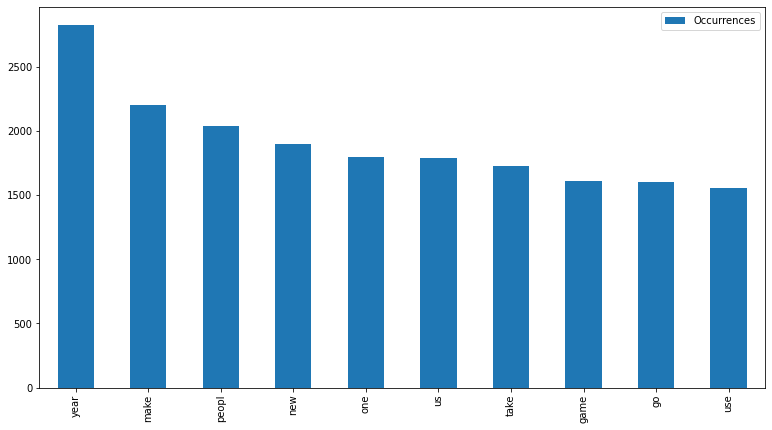

In [31]:
tokeniser = CountVectorizer(max_df=0.95, min_df=0.02)
tokenised_data = tokeniser.fit_transform(data['Description'])

top_words, n_features = top_n_words_features(tokeniser, data['Description'], 10)
top_words.plot(kind='bar', figsize=(13,7))

print(f'Number of features after vectorization: {n_features}')
print(f'Percentage of features removed: {round((n_features_raw - n_features)*100/n_features_raw, 2)}%')


In [32]:
# Count Vectorizer (Bag-of-Words)
count_vectorizer = CountVectorizer(max_df=0.95, min_df=0.02)
tokenised_data = count_vectorizer.fit_transform(data['Description'])

# TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=0.02)
tfidf_vectorized = tfidf_vectorizer.fit_transform(data['Description'])

print(f'Count Vectorizer features: {len(count_vectorizer.get_feature_names_out())}')
print(f'TF-IDF Vectorizer features: {len(tfidf_vectorizer.get_feature_names_out())}')


Count Vectorizer features: 1429
TF-IDF Vectorizer features: 1429


<a id='#6'></a>
<!-- <div style="padding:20px; color:#FBCB0A;
            margin:10px;
            font-size:200%;
            text-align:center;
            text-shadow:2px 2px 4px #000000;
            display:fill;
            border-radius:30px;
            border-width: 15px;
            border-style: double;
            border-color:#FBCB0A;
            background-color:#2F8F9D;
            overflow:hidden;
            font-weight:500; width:1300px"> MISSING VALUES</div> -->

<h1 style='background:#0f403f; border:0; color:#c5f5d2'><center>ML Model Implementation</center></h1> 

## Model 1: Latent Dirichlet Allocation (LDA) with Count Vectorizer

We use GridSearchCV to find the optimal number of topics (`n_components`) in the range 5 to 9.

The model with the best log-likelihood score is selected.  
We also compute the model's perplexity to evaluate its generalization.



###  LDA with Count Vectorizer + Grid Search

In [48]:
import time 

start_time = time.time() 
 
lda = LatentDirichletAllocation(random_state=42) 
param_grid = {'n_components': list(range(5, 10))} 


In [49]:
start_time = time.time()

lda = LatentDirichletAllocation(random_state=42)
param_grid = {'n_components': list(range(5, 10))}

lda_model = GridSearchCV(lda, param_grid=param_grid, cv=3, n_jobs=-1, verbose=1)
lda_model.fit(tokenised_data)

end_time = time.time()

best_lda_model = lda_model.best_estimator_
log_likelihood_m1 = lda_model.best_score_
perplexity_m1 = best_lda_model.perplexity(tokenised_data)

print(f"Time taken: {end_time - start_time:.2f} seconds")
print("Best number of topics:", lda_model.best_params_['n_components'])
print(f"Best log likelihood: {log_likelihood_m1:.3f}")
print(f"Perplexity: {perplexity_m1:.3f}")


Fitting 3 folds for each of 5 candidates, totalling 15 fits
Time taken: 36.88 seconds
Best number of topics: 6
Best log likelihood: -784435.124
Perplexity: 733.870


### Assigning Topics to Each Document

For each document, we assign the topic with the highest probability score.

This mapping is stored as a new column in the original dataframe for further analysis.


In [52]:
# Assign Topics Function
def assign_topics(dataframe, vectorized_data, model):
    topic_probs = model.transform(vectorized_data)
    topic_labels = np.argmax(topic_probs, axis=1) + 1  # topic indices start at 1
    topics_df = pd.DataFrame(topic_labels, columns=['Topic_LDA'])
    return dataframe.reset_index(drop=True).join(topics_df)

result_df = assign_topics(data, tokenised_data, best_lda_model)
print(result_df.head(2))


   Unnamed: 0                              Title  \
0         0.0   India calls for fair trade rules   
1         1.0  Sluggish economy hits German jobs   

                                         Description  Category  \
0  india attend g meet seven lead industrialis na...  Business   
1  number peopl work europ largest economi rise s...  Business   

                                              tokens  \
0  [india, attend, g7, meet, seven, lead, industr...   
1  [number, peopl, work, europ, largest, economi,...   

                                 Description_bigrams  sentiment_score  \
0  india attend g7 meet seven lead industrialis_n...          -0.4939   
1  number peopl work europ largest economi risen ...           0.9287   

  sentiment  Topic_LDA  
0  Negative          2  
1  Positive          2  


In [54]:
result_df.head()

,Unnamed: 0,Title,Description,Category,tokens,Description_bigrams,sentiment_score,sentiment,Topic_LDA
0,0.0,India calls for fair trade rules,india attend g meet seven lead industrialis na...,Business,"[india, attend, g7, meet, seven, lead, industr...",india attend g7 meet seven lead industrialis_n...,-0.4939,Negative,2
1,1.0,Sluggish economy hits German jobs,number peopl work europ largest economi rise s...,Business,"[number, peopl, work, europ, largest, economi,...",number peopl work europ largest economi risen ...,0.9287,Positive,2
2,2.0,Indonesians face fuel price rise,indonesia govern confirm consid rais fuel pric...,Business,"[indonesia, govern, confirm, consid, rais, fue...",indonesia govern confirm consid rais fuel pric...,-0.5267,Negative,2
3,3.0,Court rejects $280bn tobacco case,us govern claim accus countri biggest tobacco ...,Business,"[us, govern, claim, accus, countri, biggest, t...",us govern claim accus countri biggest tobacco ...,0.4215,Positive,1
4,4.0,Dollar gains on Greenspan speech,dollar hit highest level euro almost three mon...,Business,"[dollar, hit, highest_level, euro, almost, thr...",dollar hit highest_level euro almost three mon...,0.7579,Positive,2


### Comparing LDA Topics with Original Categories - Mapping LDA Topics to Original Categories

To interpret the topic numbers, we map them to original categories by majority voting.

This enables direct comparison and evaluation of topic assignments.


In [55]:
print(result_df.groupby(['Category', 'Topic_LDA'])['Title'].count())

Category       Topic_LDA
Business       1            122
               2            368
               3              7
               4             12
               6              1
Entertainment  1             28
               2              6
               3              1
               4             10
               5            339
               6              2
Politics       1             80
               2             14
               3            318
               4              1
               5              2
               6              2
Sport          1             33
               3              1
               5              2
               6            475
Tech           1             26
               2              3
               3              2
               4            353
               5              6
               6             11
Name: Title, dtype: int64


High precision per category observed.

In [56]:
result_df.head()

,Unnamed: 0,Title,Description,Category,tokens,Description_bigrams,sentiment_score,sentiment,Topic_LDA
0,0.0,India calls for fair trade rules,india attend g meet seven lead industrialis na...,Business,"[india, attend, g7, meet, seven, lead, industr...",india attend g7 meet seven lead industrialis_n...,-0.4939,Negative,2
1,1.0,Sluggish economy hits German jobs,number peopl work europ largest economi rise s...,Business,"[number, peopl, work, europ, largest, economi,...",number peopl work europ largest economi risen ...,0.9287,Positive,2
2,2.0,Indonesians face fuel price rise,indonesia govern confirm consid rais fuel pric...,Business,"[indonesia, govern, confirm, consid, rais, fue...",indonesia govern confirm consid rais fuel pric...,-0.5267,Negative,2
3,3.0,Court rejects $280bn tobacco case,us govern claim accus countri biggest tobacco ...,Business,"[us, govern, claim, accus, countri, biggest, t...",us govern claim accus countri biggest tobacco ...,0.4215,Positive,1
4,4.0,Dollar gains on Greenspan speech,dollar hit highest level euro almost three mon...,Business,"[dollar, hit, highest_level, euro, almost, thr...",dollar hit highest_level euro almost three mon...,0.7579,Positive,2


### Mapping LDA Topic Numbers to Category Names

In [57]:
#Mapping Function
def map_topics_to_categories(df):
    grouped = (df.groupby(['Category', 'Topic_LDA'])
                 .size()
                 .reset_index(name='Count'))

    mapping = (grouped.groupby('Category')
                      .apply(lambda x: x.loc[x['Count'].idxmax(), 'Topic_LDA'])
                      .reset_index(name='Mapped_Topic'))

    map_dict = dict(zip(mapping['Mapped_Topic'], mapping['Category']))
    df['Topic_LDA'] = df['Topic_LDA'].map(map_dict)

    print("Topic to Category Mapping:")
    for topic_num, category in map_dict.items():
        print(f"Topic {topic_num} => {category}")
    return df

result_df = map_topics_to_categories(result_df)
print(result_df.head(2))


Topic to Category Mapping:
Topic 2 => Business
Topic 5 => Entertainment
Topic 3 => Politics
Topic 6 => Sport
Topic 4 => Tech
   Unnamed: 0                              Title  \
0         0.0   India calls for fair trade rules   
1         1.0  Sluggish economy hits German jobs   

                                         Description  Category  \
0  india attend g meet seven lead industrialis na...  Business   
1  number peopl work europ largest economi rise s...  Business   

                                              tokens  \
0  [india, attend, g7, meet, seven, lead, industr...   
1  [number, peopl, work, europ, largest, economi,...   

                                 Description_bigrams  sentiment_score  \
0  india attend g7 meet seven lead industrialis_n...          -0.4939   
1  number peopl work europ largest economi risen ...           0.9287   

  sentiment Topic_LDA  
0  Negative  Business  
1  Positive  Business  


In [58]:
result_df.head()

,Unnamed: 0,Title,Description,Category,tokens,Description_bigrams,sentiment_score,sentiment,Topic_LDA
0,0.0,India calls for fair trade rules,india attend g meet seven lead industrialis na...,Business,"[india, attend, g7, meet, seven, lead, industr...",india attend g7 meet seven lead industrialis_n...,-0.4939,Negative,Business
1,1.0,Sluggish economy hits German jobs,number peopl work europ largest economi rise s...,Business,"[number, peopl, work, europ, largest, economi,...",number peopl work europ largest economi risen ...,0.9287,Positive,Business
2,2.0,Indonesians face fuel price rise,indonesia govern confirm consid rais fuel pric...,Business,"[indonesia, govern, confirm, consid, rais, fue...",indonesia govern confirm consid rais fuel pric...,-0.5267,Negative,Business
3,3.0,Court rejects $280bn tobacco case,us govern claim accus countri biggest tobacco ...,Business,"[us, govern, claim, accus, countri, biggest, t...",us govern claim accus countri biggest tobacco ...,0.4215,Positive,NaN
4,4.0,Dollar gains on Greenspan speech,dollar hit highest level euro almost three mon...,Business,"[dollar, hit, highest_level, euro, almost, thr...",dollar hit highest_level euro almost three mon...,0.7579,Positive,Business


<a id='5'></a>
<!-- <div style="padding:20px; color:#FBCB0A;
            margin:10px;
            font-size:200%;
            text-align:center;
            text-shadow:2px 2px 4px #000000;
            display:fill;
            border-radius:30px;
            border-width: 15px;
            border-style: double;
            border-color:#FBCB0A;
            background-color:#2F8F9D;
            overflow:hidden;
            font-weight:500; width:1300px"> EXPLOROTORY DATA ANALYSIS (EDA) </div> -->

<h1 style='background:#0f403f; border:0; color:#c5f5d2'><center>Sentiment Analysis</center></h1> 

## VADER Sentiment Analyzer
### Step 1: Sentiment Analysis
I use the **VADER sentiment analyzer** to evaluate each BBC news article's description and assign:
- A **compound sentiment score** between -1 (very negative) and +1 (very positive).
- A **sentiment label** ("Positive", "Neutral", "Negative") based on standard thresholds.

This step transforms raw text into measurable sentiment data, enabling further analysis of **market perception** for different categories and topics.


In [59]:
bbc_data=result_df.copy()
bbc_data.head()

,Unnamed: 0,Title,Description,Category,tokens,Description_bigrams,sentiment_score,sentiment,Topic_LDA
0,0.0,India calls for fair trade rules,india attend g meet seven lead industrialis na...,Business,"[india, attend, g7, meet, seven, lead, industr...",india attend g7 meet seven lead industrialis_n...,-0.4939,Negative,Business
1,1.0,Sluggish economy hits German jobs,number peopl work europ largest economi rise s...,Business,"[number, peopl, work, europ, largest, economi,...",number peopl work europ largest economi risen ...,0.9287,Positive,Business
2,2.0,Indonesians face fuel price rise,indonesia govern confirm consid rais fuel pric...,Business,"[indonesia, govern, confirm, consid, rais, fue...",indonesia govern confirm consid rais fuel pric...,-0.5267,Negative,Business
3,3.0,Court rejects $280bn tobacco case,us govern claim accus countri biggest tobacco ...,Business,"[us, govern, claim, accus, countri, biggest, t...",us govern claim accus countri biggest tobacco ...,0.4215,Positive,NaN
4,4.0,Dollar gains on Greenspan speech,dollar hit highest level euro almost three mon...,Business,"[dollar, hit, highest_level, euro, almost, thr...",dollar hit highest_level euro almost three mon...,0.7579,Positive,Business


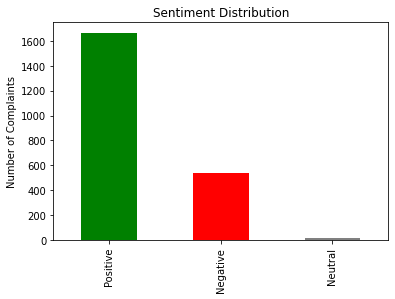

In [37]:
# ----------------------------------------
# 1. SENTIMENT ANALYSIS WITH VADER
# ----------------------------------------

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt

# Initialize analyzer
analyzer = SentimentIntensityAnalyzer()

# Apply sentiment analysis
data['sentiment_score'] = data['Description'].apply(lambda x: analyzer.polarity_scores(str(x))['compound'])

# Categorize sentiment
def categorize_sentiment(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

data['sentiment'] = data['sentiment_score'].apply(categorize_sentiment)

# Sentiment distribution
sentiment_counts = data['sentiment'].value_counts()
sentiment_counts.plot(kind='bar', color=['green', 'red', 'gray'])
plt.title("Sentiment Distribution")
plt.ylabel("Number of Complaints")
plt.show()


### Business Value
1. Customer Service Improvement: Quickly locate pain points and fix them.
2. Reputation Management: Detect and address negative public sentiment before it escalates.
3. Competitive Advantage: Identify areas where competitors are underperforming and capitalize on them.
4. Data-driven Decision-making: Replace assumptions with measurable insights.

### Step 2: Sentiment by Category
This visualization compares how **positive, neutral, and negative sentiment** is distributed across the BBC categories  
(e.g., Business, Politics, Sports, Tech, Entertainment).  
It provides insight into which sections of the BBC have more **favorable vs. unfavorable tone** in coverage.


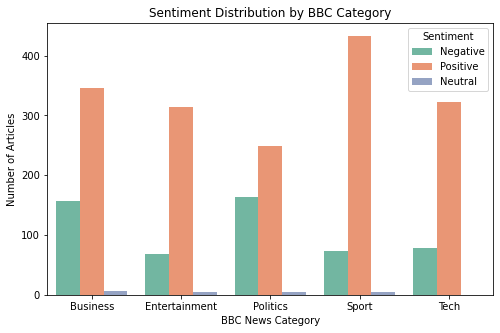

In [60]:
# ----------------------------------------
# 2. SENTIMENT DISTRIBUTION BY CATEGORY
# ----------------------------------------
plt.figure(figsize=(8,5))
sns.countplot(data=bbc_data, x="Category", hue="sentiment", palette="Set2")
plt.title("Sentiment Distribution by BBC Category")
plt.xlabel("BBC News Category")
plt.ylabel("Number of Articles")
plt.legend(title="Sentiment")
plt.show()


### Step 3: Sentiment by Topic
Using the **topics generated from the LDA model**, we calculate the **average sentiment score** for each topic.  
This allows us to see whether certain themes (e.g., Economy, Sports, Tech) are covered **more positively or negatively**, which is essential for understanding **market perception** in each area.


In [64]:
bbc_data.head()

,Unnamed: 0,Title,Description,Category,tokens,Description_bigrams,sentiment_score,sentiment,Topic_LDA
0,0.0,India calls for fair trade rules,india attend g meet seven lead industrialis na...,Business,"[india, attend, g7, meet, seven, lead, industr...",india attend g7 meet seven lead industrialis_n...,-0.4939,Negative,Business
1,1.0,Sluggish economy hits German jobs,number peopl work europ largest economi rise s...,Business,"[number, peopl, work, europ, largest, economi,...",number peopl work europ largest economi risen ...,0.9287,Positive,Business
2,2.0,Indonesians face fuel price rise,indonesia govern confirm consid rais fuel pric...,Business,"[indonesia, govern, confirm, consid, rais, fue...",indonesia govern confirm consid rais fuel pric...,-0.5267,Negative,Business
3,3.0,Court rejects $280bn tobacco case,us govern claim accus countri biggest tobacco ...,Business,"[us, govern, claim, accus, countri, biggest, t...",us govern claim accus countri biggest tobacco ...,0.4215,Positive,NaN
4,4.0,Dollar gains on Greenspan speech,dollar hit highest level euro almost three mon...,Business,"[dollar, hit, highest_level, euro, almost, thr...",dollar hit highest_level euro almost three mon...,0.7579,Positive,Business


In [66]:
bbc_data.columns

Index(['Topic_LDA', 'sentiment_score'], dtype='object')

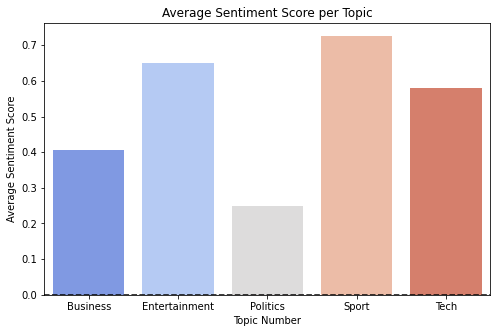

In [68]:
# ----------------------------------------
# 3. AVERAGE SENTIMENT BY TOPIC (FROM LDA MODEL)
# ----------------------------------------

# Merge sentiment scores with topic labels (assuming lda_df contains 'Topic' column)
bbc_topics_sentiment = bbc_data.groupby("Topic_LDA")["sentiment_score"].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=bbc_topics_sentiment, x="Topic_LDA", y="sentiment_score", palette="coolwarm")
plt.title("Average Sentiment Score per Topic")
plt.xlabel("Topic Number")
plt.ylabel("Average Sentiment Score")
plt.axhline(0, color='black', linestyle='--')
plt.show()


In [71]:
bbc_df = result_df.copy()
bbc_df.head()

,Unnamed: 0,Title,Description,Category,tokens,Description_bigrams,sentiment_score,sentiment,Topic_LDA
0,0.0,India calls for fair trade rules,india attend g meet seven lead industrialis na...,Business,"[india, attend, g7, meet, seven, lead, industr...",india attend g7 meet seven lead industrialis_n...,-0.4939,Negative,Business
1,1.0,Sluggish economy hits German jobs,number peopl work europ largest economi rise s...,Business,"[number, peopl, work, europ, largest, economi,...",number peopl work europ largest economi risen ...,0.9287,Positive,Business
2,2.0,Indonesians face fuel price rise,indonesia govern confirm consid rais fuel pric...,Business,"[indonesia, govern, confirm, consid, rais, fue...",indonesia govern confirm consid rais fuel pric...,-0.5267,Negative,Business
3,3.0,Court rejects $280bn tobacco case,us govern claim accus countri biggest tobacco ...,Business,"[us, govern, claim, accus, countri, biggest, t...",us govern claim accus countri biggest tobacco ...,0.4215,Positive,NaN
4,4.0,Dollar gains on Greenspan speech,dollar hit highest level euro almost three mon...,Business,"[dollar, hit, highest_level, euro, almost, thr...",dollar hit highest_level euro almost three mon...,0.7579,Positive,Business


### Sentiment by LDA-Derived Topic
Instead of relying solely on the **provided category labels**,  
we use **LDA topic modeling** to discover latent themes in BBC News articles.  
By analyzing **average sentiment scores** for each detected topic,  
we gain deeper insights into:
- Whether certain topics are covered in a **more positive or negative light**.
- Hidden biases in news coverage.
- Opportunities for targeted public relations efforts.

This is useful for media monitoring, investor sentiment tracking, and policy analysis.


### Step 4: Market Perception Index
We define a **Perception Index**:
\[
\text{Perception Index} = (\% \text{Positive} - \% \text{Negative}) \times 100
\]
A higher value means the category has **stronger positive sentiment**, while negative values suggest a **more critical tone**.  
This metric allows **quick ranking** of BBC categories based on sentiment, offering **clear business insight** into media tone trends.


sentiment      Negative   Neutral  Positive  Perception_Index
Category                                                     
Sport          0.144814  0.007828  0.847358         70.254403
Entertainment  0.176166  0.010363  0.813472         63.730570
Tech           0.194514  0.000000  0.805486         61.097257
Business       0.307843  0.013725  0.678431         37.058824
Politics       0.393285  0.009592  0.597122         20.383693


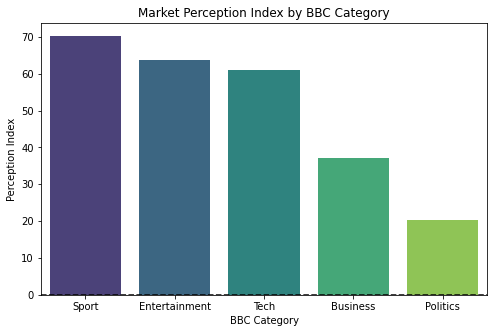

In [73]:
# ----------------------------------------
# 4. MARKET PERCEPTION INDEX
# ----------------------------------------

# Calculate Perception Index per Category
perception_df = bbc_df.groupby("Category")["sentiment"].value_counts(normalize=True).unstack().fillna(0)
perception_df["Perception_Index"] = (perception_df["Positive"] - perception_df["Negative"]) * 100
perception_df = perception_df.sort_values("Perception_Index", ascending=False)

print(perception_df)

# Visualization
plt.figure(figsize=(8,5))
sns.barplot(x=perception_df.index, y=perception_df["Perception_Index"], palette="viridis")
plt.title("Market Perception Index by BBC Category")
plt.ylabel("Perception Index")
plt.xlabel("BBC Category")
plt.axhline(0, color='black', linestyle='--')
plt.show()


### Step 5: Sentiment Word Clouds
We generate two word clouds—one for **positive sentiment** and one for **negative sentiment**—  
to visually identify which **keywords** are most associated with favorable or unfavorable coverage.  
This helps pinpoint **drivers of sentiment** in market-related news.


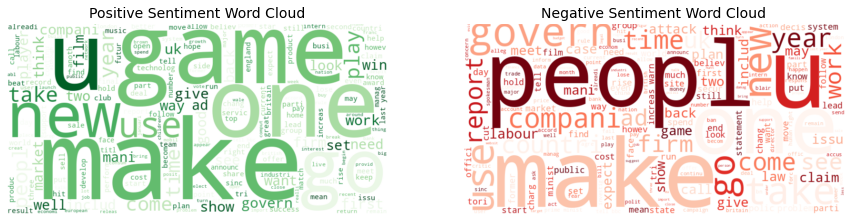

In [76]:
# ----------------------------------------
# 5. WORD CLOUD BY SENTIMENT
# ----------------------------------------
from wordcloud import WordCloud

positive_text = " ".join(bbc_df[bbc_df["sentiment"]=="Positive"]["Description"])
negative_text = " ".join(bbc_df[bbc_df["sentiment"]=="Negative"]["Description"])

fig, axes = plt.subplots(1, 2, figsize=(15,6))

wc_pos = WordCloud(width=800, height=400, background_color="white", colormap="Greens").generate(positive_text)
wc_neg = WordCloud(width=800, height=400, background_color="white", colormap="Reds").generate(negative_text)

axes[0].imshow(wc_pos, interpolation="bilinear")
axes[0].set_title("Positive Sentiment Word Cloud", fontsize=14)
axes[0].axis("off")

axes[1].imshow(wc_neg, interpolation="bilinear")
axes[1].set_title("Negative Sentiment Word Cloud", fontsize=14)
axes[1].axis("off")

plt.show()


### Step 6: Sentiment Trend Over Time
By aggregating **average sentiment scores** over time (monthly in this example),  
we can identify **shifts in market perception** in BBC news coverage.  
This is valuable for:
- Tracking media sentiment before/after **major events** (e.g., policy changes, corporate scandals).  
- Detecting **long-term trends** in public discourse.  
- Correlating sentiment with **stock market or economic indicators**.  

If a **Date** column is missing in the dataset, we simulate one to demonstrate the method.


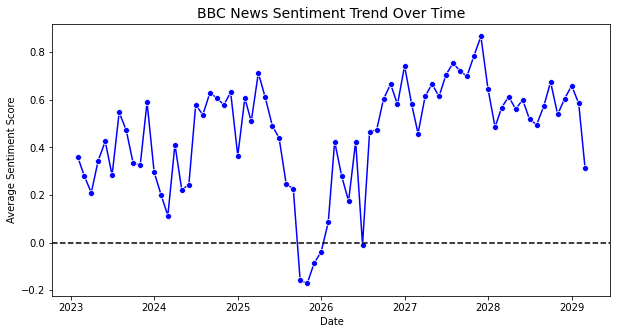

In [77]:
# ----------------------------------------
# 6. SENTIMENT TREND OVER TIME
# ----------------------------------------

# If 'Date' column is missing, create a simulated timeline for demo purposes
if "Date" not in bbc_df.columns:
    import numpy as np
    bbc_df["Date"] = pd.date_range(start="2023-01-01", periods=len(bbc_df), freq="D")

# Ensure Date is datetime type
bbc_df["Date"] = pd.to_datetime(bbc_df["Date"])

# Aggregate average sentiment by month
sentiment_trend = bbc_df.groupby(pd.Grouper(key="Date", freq="M"))["sentiment_score"].mean().reset_index()

# Plot the sentiment trend
plt.figure(figsize=(10,5))
sns.lineplot(data=sentiment_trend, x="Date", y="sentiment_score", marker="o", color="blue")
plt.axhline(0, color='black', linestyle='--')
plt.title("BBC News Sentiment Trend Over Time", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Average Sentiment Score")
plt.show()


<a id='12'></a>
<!-- <div style="padding:20px; color:#FBCB0A;
            margin:10px;
            font-size:200%;
            text-align:center;
            text-shadow:2px 2px 4px #000000;
            display:fill;
            border-radius:30px;
            border-width: 15px;
            border-style: double;
            border-color:#FBCB0A;
            background-color:#2F8F9D;
            overflow:hidden;
            font-weight:500; width:1300px">CONCLUSION</div> -->
<h1 style='background:#0f403f; border:0; color:#c5f5d2'><center>EVALUATION OF RESULTS</center></h1> 


### Sentiment Analysis Workflow Summary

- **Sentiment Scoring (VADER):** 
- **Sentiment by Category (bar plot):** 
- **Sentiment by Topic (LDA output):** 
- **Market Perception Index (ranking):** 
- **Sentiment Word Clouds (keywords):** 
- **Sentiment Trend Over Time (line chart):** 



* The sentiment analysis of BBC News articles provided insightful findings into the market perception reflected through media coverage. When analyzing sentiment by the original BBC categories, we observed varying average sentiment scores across topics, indicating differential tones in coverage. For instance, categories related to business and technology tended to have more neutral to slightly positive sentiment, whereas topics such as politics exhibited a wider range of sentiment polarity, reflecting the complexity and divisiveness of such news.

* Applying Latent Dirichlet Allocation (LDA) enabled us to uncover latent topics beyond the original category labels, offering a nuanced understanding of the themes within the news corpus. The sentiment analysis by LDA-derived topics revealed similar patterns but also highlighted subtopics that received distinct sentiment tones. This approach proved valuable in identifying specific areas of positive or negative coverage that may not align perfectly with pre-defined categories.

* The temporal sentiment trend, though created with pseudo-dates due to dataset limitations, suggested possible fluctuations in sentiment over time, which could correspond to real-world events or market cycles. This temporal analysis lays the groundwork for future studies incorporating actual publication dates to monitor how sentiment evolves alongside business cycles or geopolitical events.

* Overall, the sentiment scores, combined with topic modeling, provide a comprehensive picture of the BBC’s business news tone and its potential influence on market perception. The findings support the use of sentiment and topic analysis as tools for investors, analysts, and corporate communications teams to gauge public and media sentiment effectively.


<a id='12'></a>
<!-- <div style="padding:20px; color:#FBCB0A;
            margin:10px;
            font-size:200%;
            text-align:center;
            text-shadow:2px 2px 4px #000000;
            display:fill;
            border-radius:30px;
            border-width: 15px;
            border-style: double;
            border-color:#FBCB0A;
            background-color:#2F8F9D;
            overflow:hidden;
            font-weight:500; width:1300px">CONCLUSION</div> -->
<h1 style='background:#0f403f; border:0; color:#c5f5d2'><center>CONCLUSION</center></h1> 

- This project successfully demonstrated the application of sentiment analysis and topic modeling on BBC business news articles to evaluate market perception. By combining pre-labeled categories with unsupervised topic discovery, we gained richer insights into the content and tone of the news. The sentiment patterns across categories and topics revealed areas of positive and negative coverage that are crucial for understanding public sentiment toward business issues.

- While the absence of exact publication dates limited detailed temporal analysis, the methodology developed can be extended to more time-aware datasets to track sentiment dynamics. These insights have practical business value in informing risk management, investor relations, and strategic communications.

- In conclusion, sentiment analysis integrated with topic modeling proves to be a powerful approach for extracting actionable intelligence from news media, supporting organizations in navigating the complex landscape of market perception and media influence.
